In [0]:
import warnings 
warnings.simplefilter(action='ignore',category=FutureWarning)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
chrun_master_df = pd.read_csv("https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_st.csv")

In [0]:
df = chrun_master_df.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   ServiceCount      7043 non-null   int64  
 5   Contract          7043 non-null   object 
 6   PaperlessBilling  7043 non-null   object 
 7   MonthlyCharges    7043 non-null   float64
 8   TotalCharges      7016 non-null   float64
 9   Churn             7043 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 550.4+ KB


In [6]:

print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nUnique values :  \n",df.nunique())

Rows     :  7043
Columns  :  10

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'tenure', 'ServiceCount', 'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn']

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
tenure                73
ServiceCount           9
Contract               3
PaperlessBilling       2
MonthlyCharges      1585
TotalCharges        6514
Churn                  2
dtype: int64


In [7]:
df.corr()

SeniorCitizen    tenure  ...  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.016567  ...        0.220173      0.100795
tenure               0.016567  1.000000  ...        0.247900      0.826066
ServiceCount        -0.090899  0.508526  ...        0.041463      0.443768
MonthlyCharges       0.220173  0.247900  ...        1.000000      0.650964
TotalCharges         0.100795  0.826066  ...        0.650964      1.000000

[5 rows x 5 columns]

That shows correlation for numerical columns only not for categorical. That's why we'll use Cramer's Test.

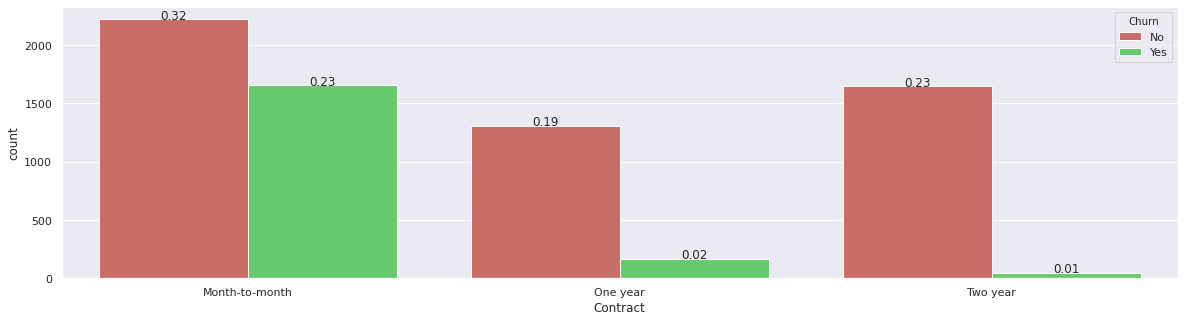

In [15]:
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="Contract", hue="Churn", data=df)

#to show values on Bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height +3,
            '{:1.2f}'.format(height/df.shape[0]),
            ha="center")

![alt text](https://i.imgur.com/UlTPzPi.png[/img])
![alt text](https://miro.medium.com/max/1000/1*6KNXPv-_3s7cJrcOQxbZCw.png)
![alt text](https://image.slidesharecdn.com/t10-statisiticalanalysis-120321013443-phpapp01/95/t10-statisitical-analysis-39-728.jpg?cb=1332293945)



V=SQRT(chi2/(n*(min(C,R)-1))


In [0]:
con_churn_ct=pd.crosstab(index=df['Contract'],columns=df['Churn'],margins=1)

In [21]:
con_churn_ct

Churn             No   Yes   All
Contract                        
Month-to-month  2220  1655  3875
One year        1307   166  1473
Two year        1647    48  1695
All             5174  1869  7043

In [0]:
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([con_churn_ct.iloc[0].values,con_churn_ct.iloc[1].values,con_churn_ct.iloc[2].values])

In [24]:
print ("chi2     : " ,chi2)
print ("p-value  : " ,p)
print ("Degree for Freedom : " ,dof)

chi2     :  1184.5965720837926
p-value  :  3.478530574787507e-255
Degree for Freedom :  4


High Chi value shows strong relationship


In [27]:
import numpy as np
#row count =2 
Vtest=np.sqrt(chi2/df.shape[0]*(2-1))
print("Correlation Value: ",round(Vtest,2))

Correlation Value:  0.41


This value varies from 0 to 1. You should study comparative correlation of cat vars in your dataset.

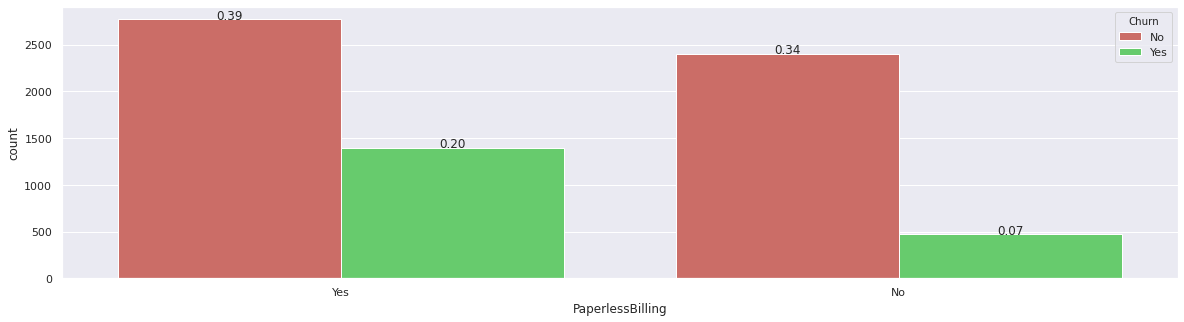

In [29]:
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="PaperlessBilling", hue="Churn", data=df)

#to show values on Bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height +3,
            '{:1.2f}'.format(height/df.shape[0]),
            ha="center")

In [0]:
Bill_churn_ct=pd.crosstab(index=df['PaperlessBilling'],columns=df['Churn'])

In [34]:
Bill_churn_ct

Churn               No   Yes
PaperlessBilling            
No                2403   469
Yes               2771  1400

In [0]:
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([Bill_churn_ct.iloc[0].values,Bill_churn_ct.iloc[1].values])

In [37]:
print ("chi2     : " ,chi2)
print ("p-value  : " ,p)
print ("Degree for Freedom : " ,dof)

chi2     :  258.27764906707307
p-value  :  4.073354668665985e-58
Degree for Freedom :  1


In [38]:
Vtest=np.sqrt(chi2/df.shape[0]*(2-1))
print("Correlation Value: ",round(Vtest,2))

Correlation Value:  0.19


In [0]:
def CramerTest(value):
  #plot countplot
  sns.set(style="darkgrid")
  sns.set_palette("hls", 3)
  fig, ax = plt.subplots(figsize=(20,5))
  ax = sns.countplot(x=value, hue="Churn", data=df)

  #to show values on Bar
  for p in ax.patches:
      height = p.get_height()
      ax.text(p.get_x()+p.get_width()/2.,
            height +3,
            '{:1.2f}'.format(height/df.shape[0]),
            ha="center")
  #crosstab
  if df[value].nunique() == 2:
    col_churn_ct=pd.crosstab(index=df[value],columns=df['Churn'])
    (chi2, p, dof,_) = stats.chi2_contingency([col_churn_ct.iloc[0].values,col_churn_ct.iloc[1].values])
  else:
    col_churn_ct=pd.crosstab(index=df[value],columns=df['Churn'],margins=True)
    (chi2, p, dof,_) = stats.chi2_contingency([col_churn_ct.iloc[0].values,col_churn_ct.iloc[1].values,col_churn_ct.iloc[2].values])
  

  #chi-value
  print ("chi2     : " ,chi2)
  print ("p-value  : " ,p)
  print ("Degree for Freedom : " ,dof)

  #vtestvalue
  Vtest=np.sqrt(chi2/df.shape[0])
  print("Correlation Value: ",round(Vtest,2))



chi2     :  0.4840828822091383
p-value  :  0.48657873605618596
Degree for Freedom :  1
Correlation Value:  0.01


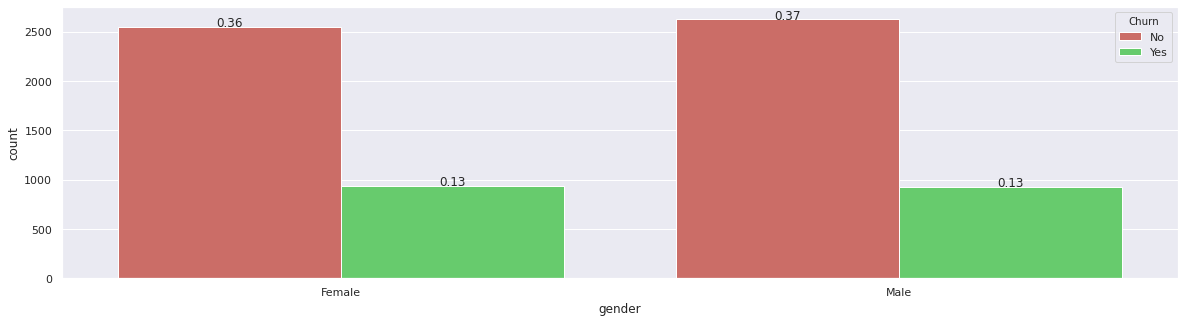

In [45]:
CramerTest("gender")